#### Synth and ana debugging

In [ ]:
# Setting basics: parameters and output-name
exName = Path("exp-NAA-0")
subdir = Path()

RUNs = [1, 20 , 40]
SDs = [0.001, 0.01, 1, 5, 10, 20, 30, 200]

para = "NAA"
CONs = [0.05, 0.2, 0.4, 0.6, 1, 1.5, 1.8, 2, 3, 5] 
absolute = False  # False -> relative changes

In [ ]:
# generating data
for n in RUNs:
    for sd in SDs:
        mcCall(n, sd, para=para, step=CONs, absolute=absolute, output=exName)     

In [4]:
# load plotting data
datas, mindex = mcGraf(subdir)
data = pd.concat(datas, axis=1)
data.columns = mindex
format_data = data.unstack(level=1).stack(level="runs").droplevel(axis=0, level=1).reset_index(drop=True)
format_data.columns = format_data.columns.set_names('metabolites', level=4)

In [5]:
# edit plotting data
index = format_data.melt().metabolites=="NAA"
to_plot = format_data.melt().loc[index,:]

# for selecting range:
#index_2 = to_plot.change!="0.5"
#to_plot_2 = to_plot.loc[index_2,:]

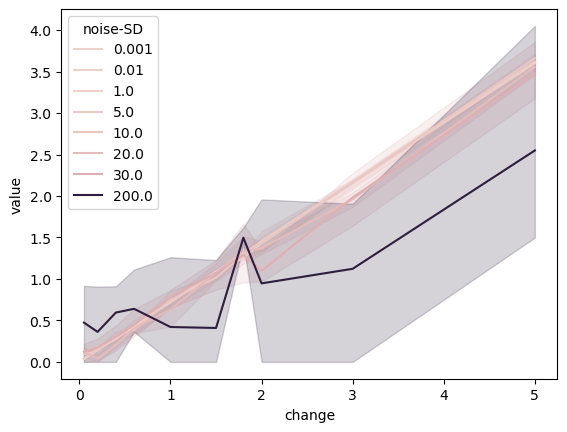

In [6]:
# plotting data
import seaborn as sns
import matplotlib.pyplot as mtplot
sns.lineplot(data=to_plot, x='change', y='value', hue='noise-SD', legend="full")

# when range was selected above
#sns.lineplot(data=to_plot_2, x='change', y='value', hue='noise-SD', dashes=True, legend="full")

# to set plot range
#mtplot.ylim([0.69,0.70])
#mtplot.xlim([1.6,2.0])